### 1. Data overview

In [1]:
#import librairies
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
order_products_train = pd.read_csv('./order_products__train.csv')
order_products_prior = pd.read_csv('./order_products__prior.csv')
orders = pd.read_csv('./orders.csv')
products = pd.read_csv('./products.csv')
aisles = pd.read_csv('./aisles.csv')
departments = pd.read_csv('./departments.csv')

In [3]:
# view the data
order_products_train.head(5)
# order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [4]:
order_products_train.shape

(1384617, 4)

In [5]:
order_products_prior.shape

(32434489, 4)

In [6]:
order_all = pd.concat([order_products_train, order_products_prior], axis = 0)

In [7]:
# checking for null values 
null = pd.DataFrame({'Null Values' : order_all.isna().sum(), 
                     'Percentage Null Values' : (order_all.isna().sum()) / (order_all.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [8]:
# Check the number of unique orders and unique products
orders_unique = len(set(order_all.order_id))
products_unique = len(set(order_all.product_id))
print("There are %s orders for %s products" %(orders_unique, products_unique))

There are 3346083 orders for 49685 products


### 2. Data Visualization

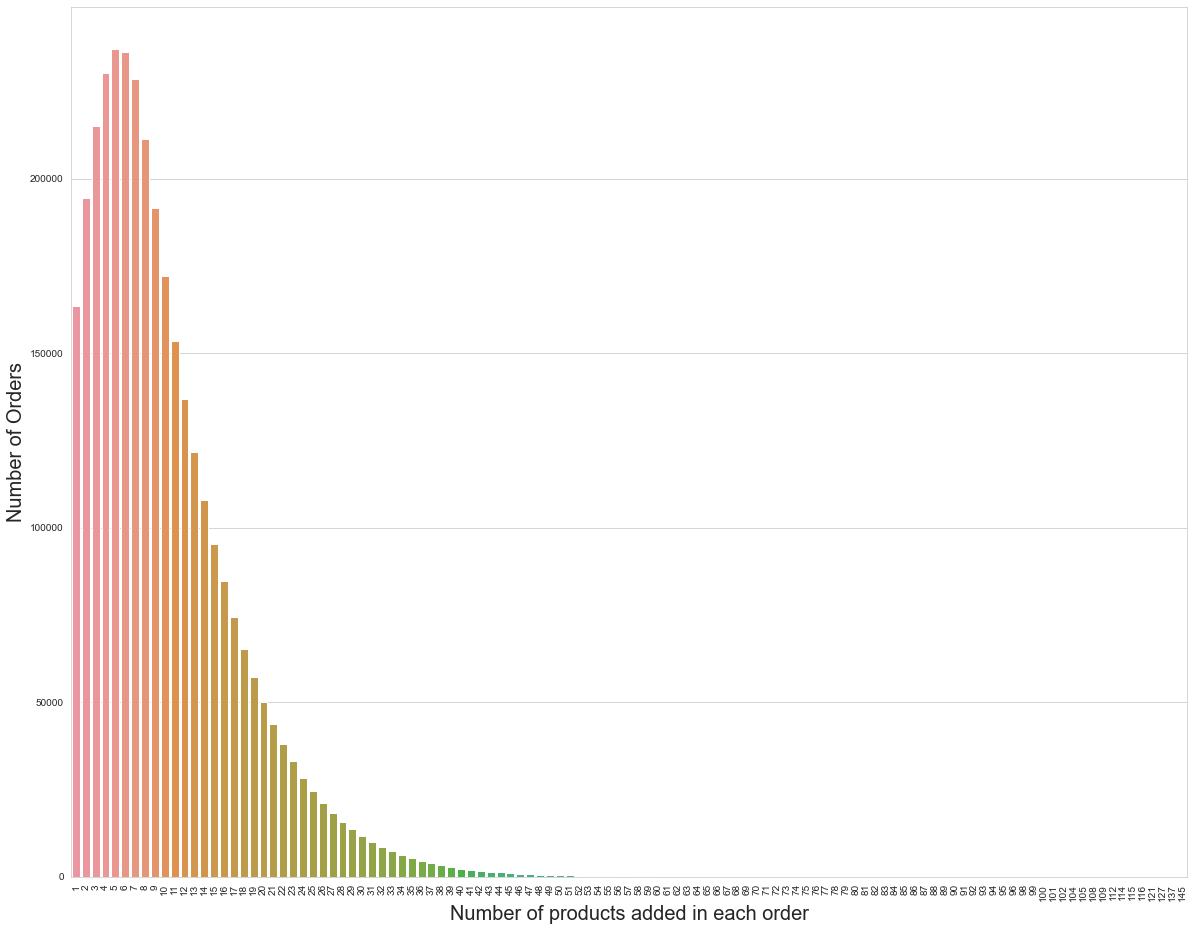

In [9]:
# check how many items people usually ordered
gp1 = order_all.groupby("order_id")["add_to_cart_order"].agg("max").reset_index()
gp1 = gp1.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize = (20, 16))
plt.xticks(rotation = 'vertical')
sns.barplot(gp1.index, gp1.values)

plt.ylabel('Number of Orders', fontsize = 20)
plt.xlabel('Number of products added in each order', fontsize = 20)
plt.show()

Most people order 1 to 11 products each time

In [10]:
# find the best sell products
gp2 = order_all.groupby("product_id")["reordered"].agg([('Total_reorders', 'count')]).reset_index()
gp2 = pd.merge(gp2, products[['product_id', 'product_name']], how = 'left', on = ['product_id'])
gp2 = gp2.sort_values(by = 'Total_reorders', ascending = False)[:10]
gp2

,product_id,Total_reorders,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries
26206,26209,146660,Limes
27842,27845,142813,Organic Whole Milk


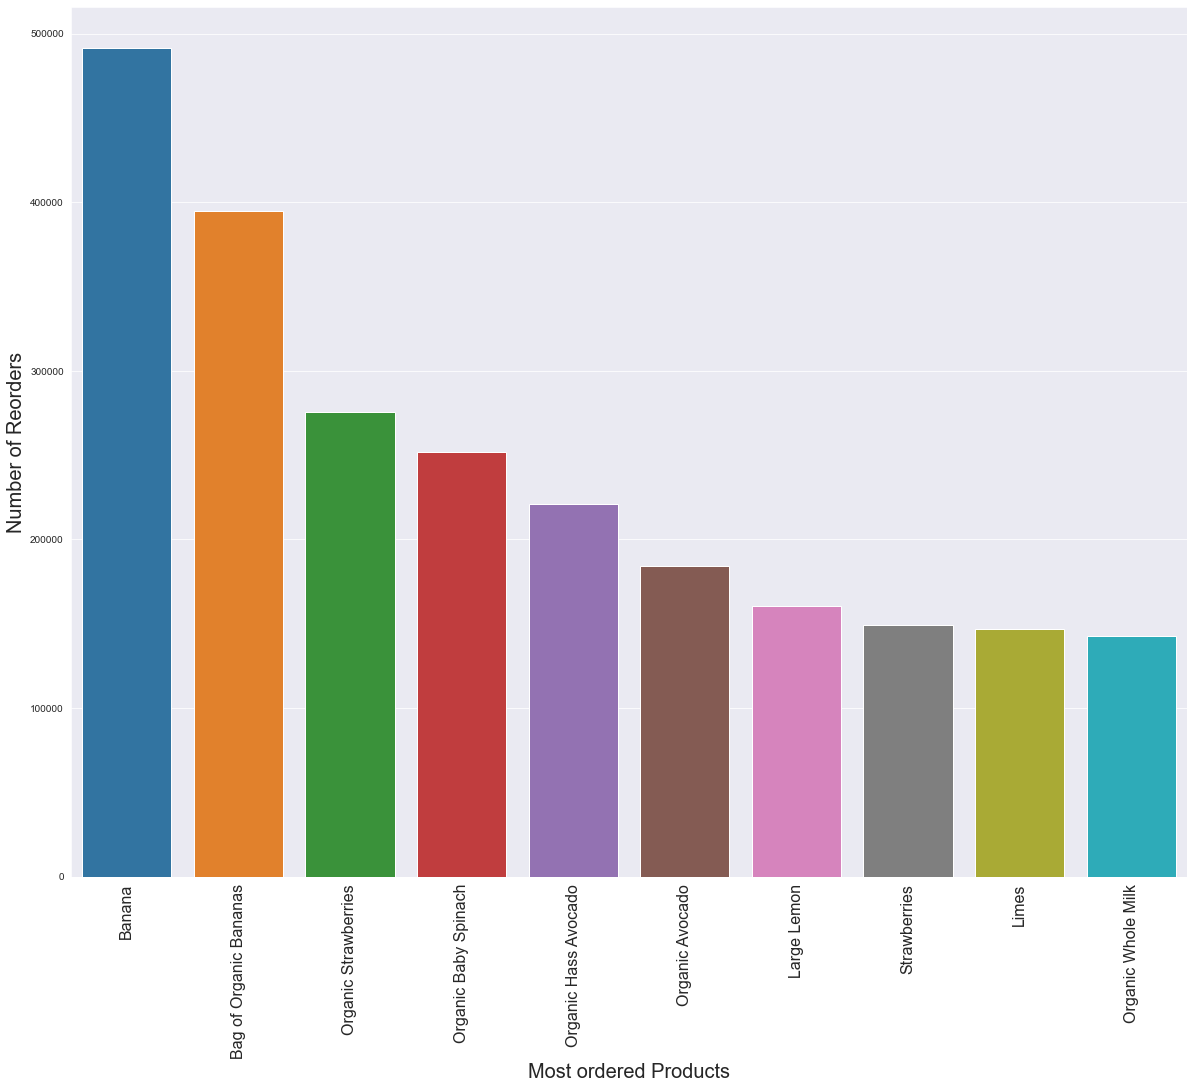

In [11]:
# view the top 10 sell products
gp2  = gp2.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20, 16))
plt.xticks(rotation = 'vertical',fontsize = 16)
sns.barplot(gp2.index, gp2.values)
plt.ylabel('Number of Reorders', fontsize = 20)
plt.xlabel('Most ordered Products', fontsize = 20)
plt.show()

In [12]:
# how often people reorder the products
gp3 = order_all.groupby("reordered")["product_id"].agg([('Total_products', 'count')]).reset_index()
gp3['Ratios'] = gp3["Total_products"].apply(lambda x: x / gp3['Total_products'].sum())
gp3

,reordered,Total_products,Ratios
0,0,13863746,0.409938
1,1,19955360,0.590062


nearly 60% people reordered from the store

In [13]:
# find the most reordered products
gp4 = order_all.groupby("product_id")["reordered"].agg([('reorder_sum', sum), ('reorder_total', 'count')]).reset_index()
gp4['reorder_probability'] = gp4['reorder_sum'] / gp4['reorder_total']
gp4 = pd.merge(gp4, products[['product_id', 'product_name']], how = 'left', on = ['product_id'])
gp4 = gp4[gp4.reorder_total > 75].sort_values(['reorder_probability'], ascending = False)[:10]
gp4

,product_id,reorder_sum,reorder_total,reorder_probability,product_name
2074,2075,84,90,0.933333,Serenity Ultimate Extrema Overnight Pads
27737,27740,94,102,0.921569,Chocolate Love Bar
35601,35604,93,104,0.894231,Maca Buttercups
38248,38251,99,111,0.891892,Benchbreak Chardonnay
36798,36801,88,99,0.888889,Organic Blueberry B Mega
10233,10236,114,131,0.870229,Fragrance Free Clay with Natural Odor Eliminat...
20595,20598,99,114,0.868421,Thousand Island Salad Snax
5455,5457,78,90,0.866667,Classic Carbonated Natural Mineral Water
35493,35496,394,457,0.862144,Real2 Alkalized Water 500 ml
9289,9292,2580,2995,0.861436,Half And Half Ultra Pasteurized


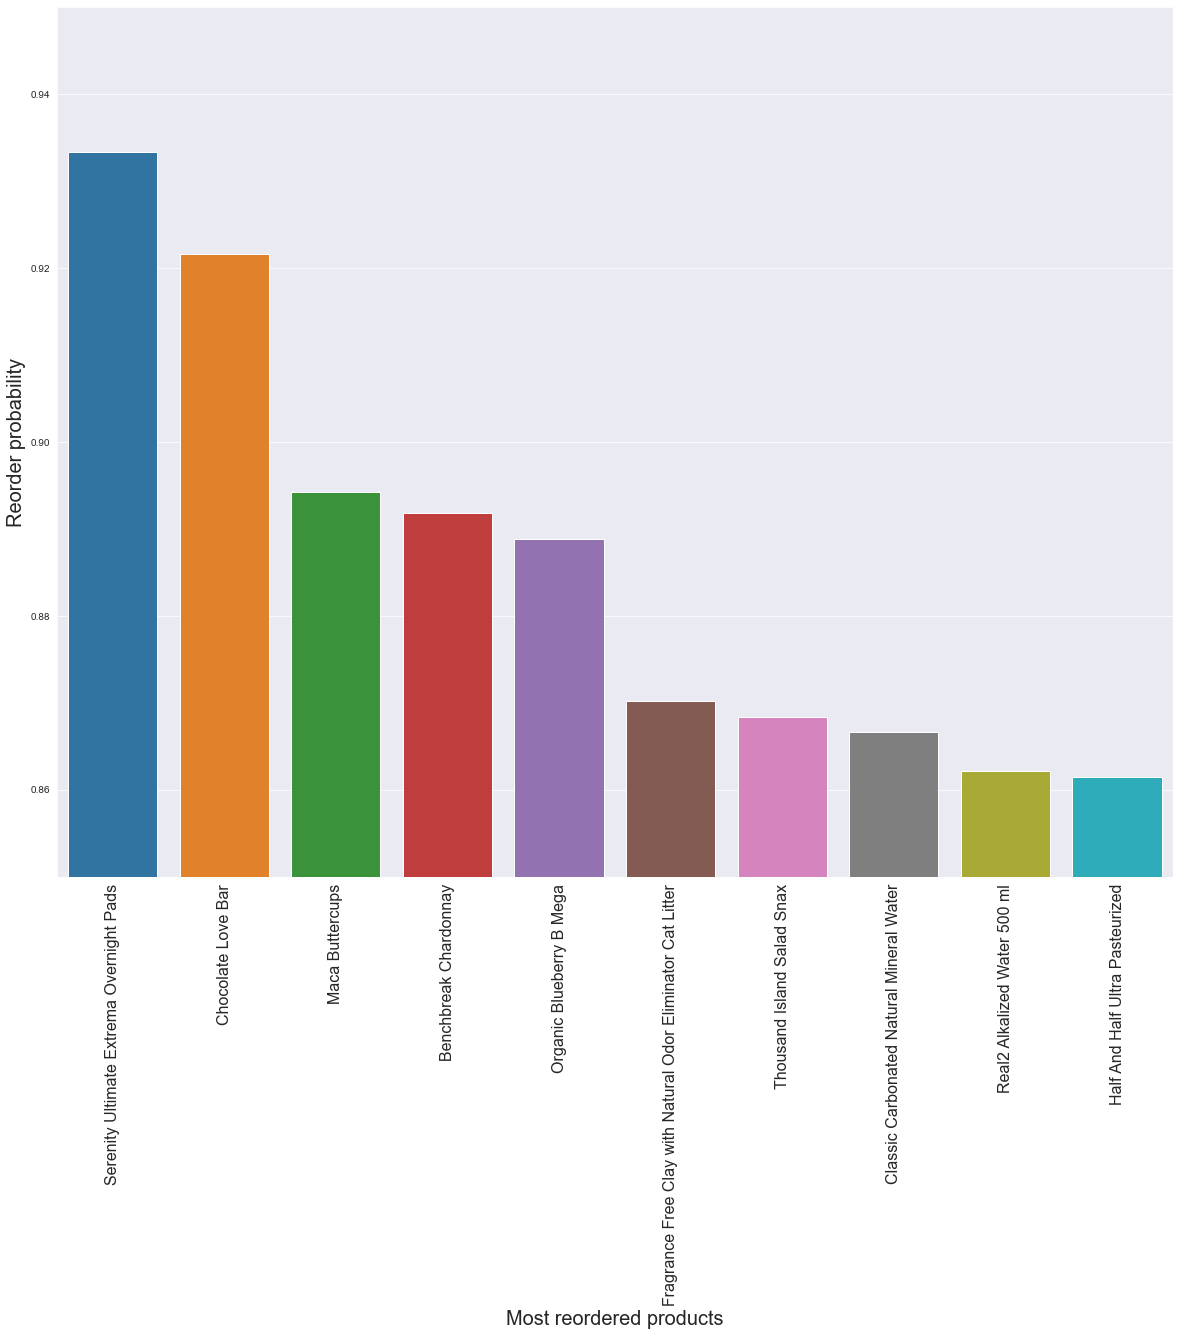

In [14]:
# view the top 10 most reordered products
gp4  = gp4.groupby(['product_name']).sum()['reorder_probability'].sort_values(ascending = False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20, 16))
plt.xticks(rotation = 'vertical', fontsize = 16)
sns.barplot(gp4.index, gp4.values)
plt.ylim([0.85, 0.95])
plt.ylabel('Reorder probability', fontsize = 20)
plt.xlabel('Most reordered products', fontsize = 20)
plt.show()

In [15]:
# check orders file
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
# checking for null values 
null = pd.DataFrame({'Null Values' : orders.isna().sum(), 
                     'Percentage Null Values' : (orders.isna().sum()) / (orders.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,6.027594


as we can see, the missing value is related to the 1st order of a customer, since there is no prior order for the 1st one

Let's see when and what time people usually make orders

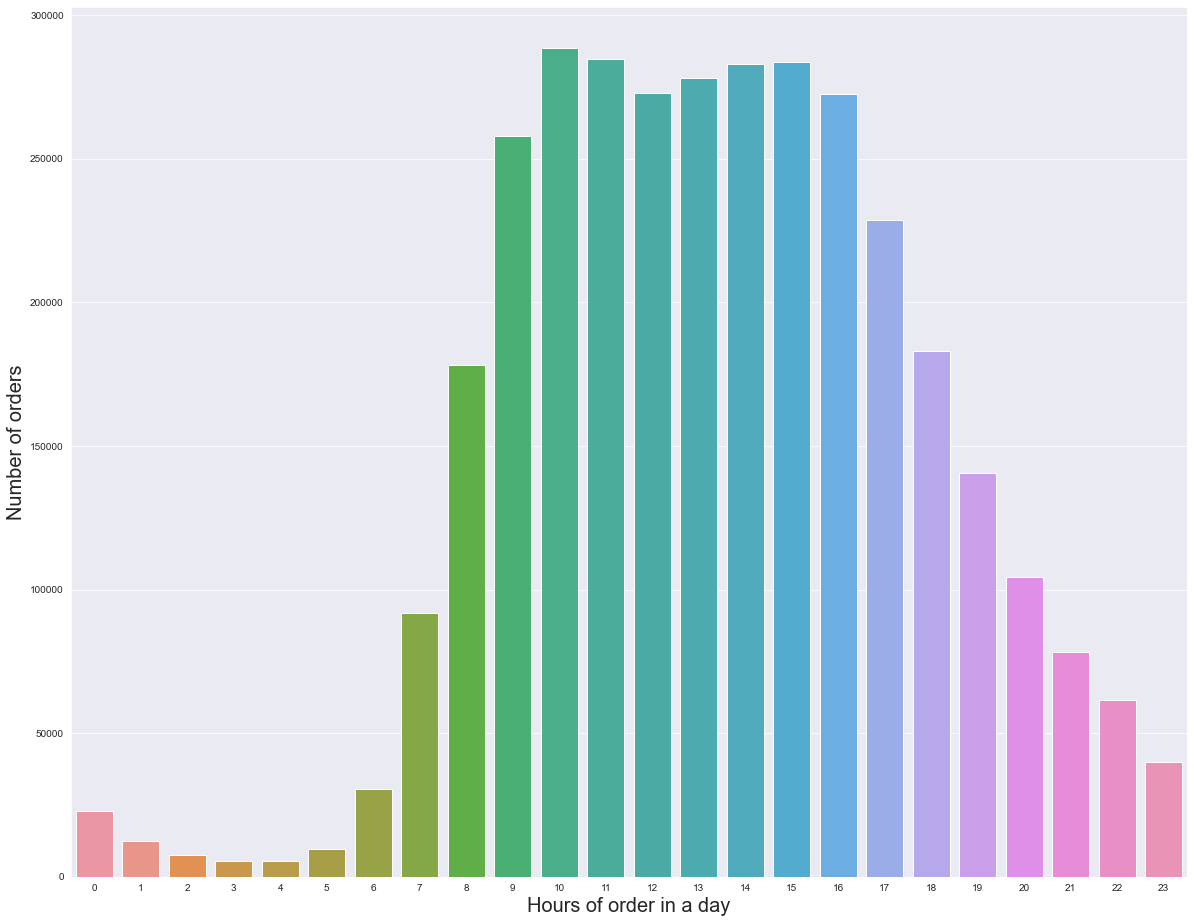

In [17]:
# Hours of Order in a Day
gp5 = orders.groupby("order_id")["order_hour_of_day"].agg("sum").reset_index()
gp5 = gp5.order_hour_of_day.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20, 16))
sns.barplot(gp5.index, gp5.values)
plt.ylabel('Number of orders', fontsize = 20)
plt.xlabel('Hours of order in a day', fontsize = 20)
plt.show()

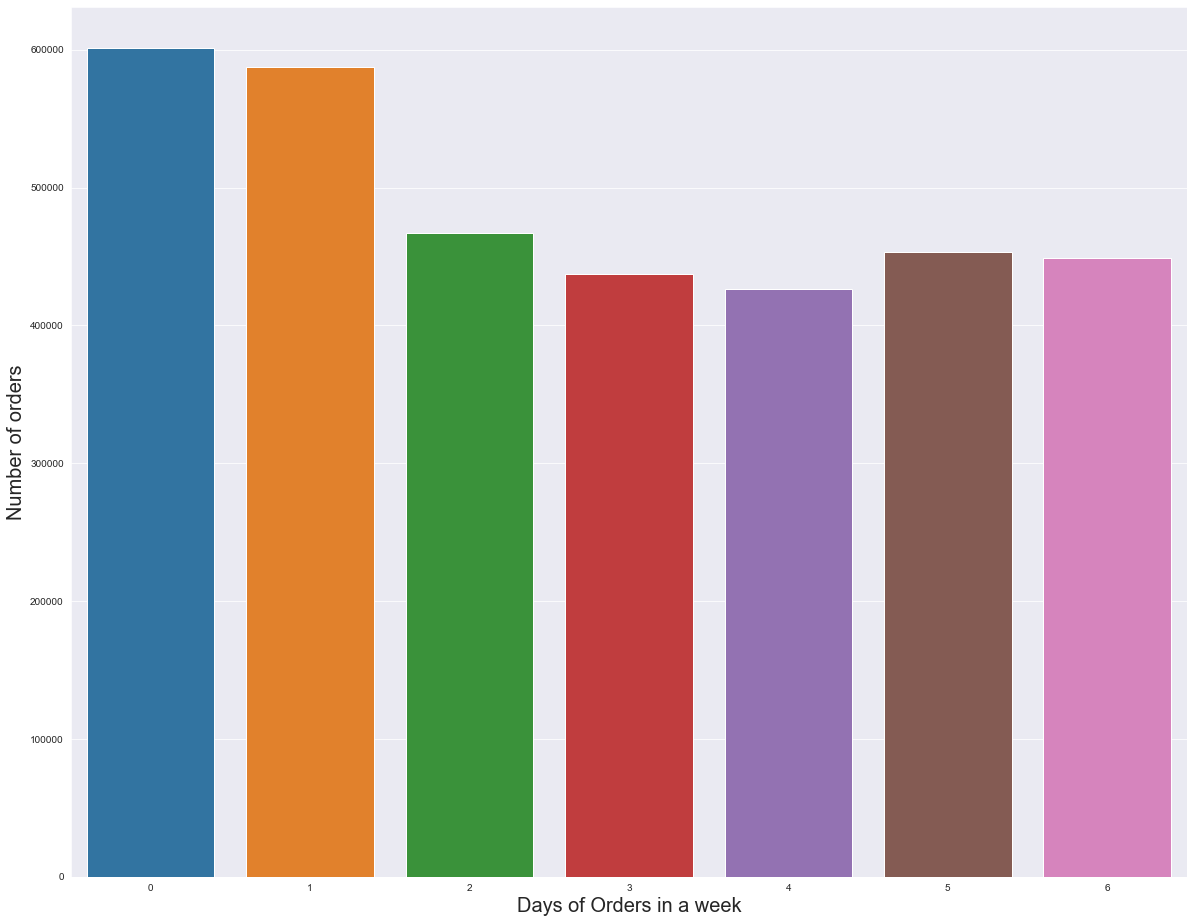

In [18]:
# Days of Orders in a week
gp6 = orders.groupby("order_id")["order_dow"].agg("sum").reset_index()
gp6 = gp6.order_dow.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20, 16))
sns.barplot(gp6.index, gp6.values)
plt.ylabel('Number of orders', fontsize = 20)
plt.xlabel('Days of Orders in a week', fontsize = 20)
plt.show()

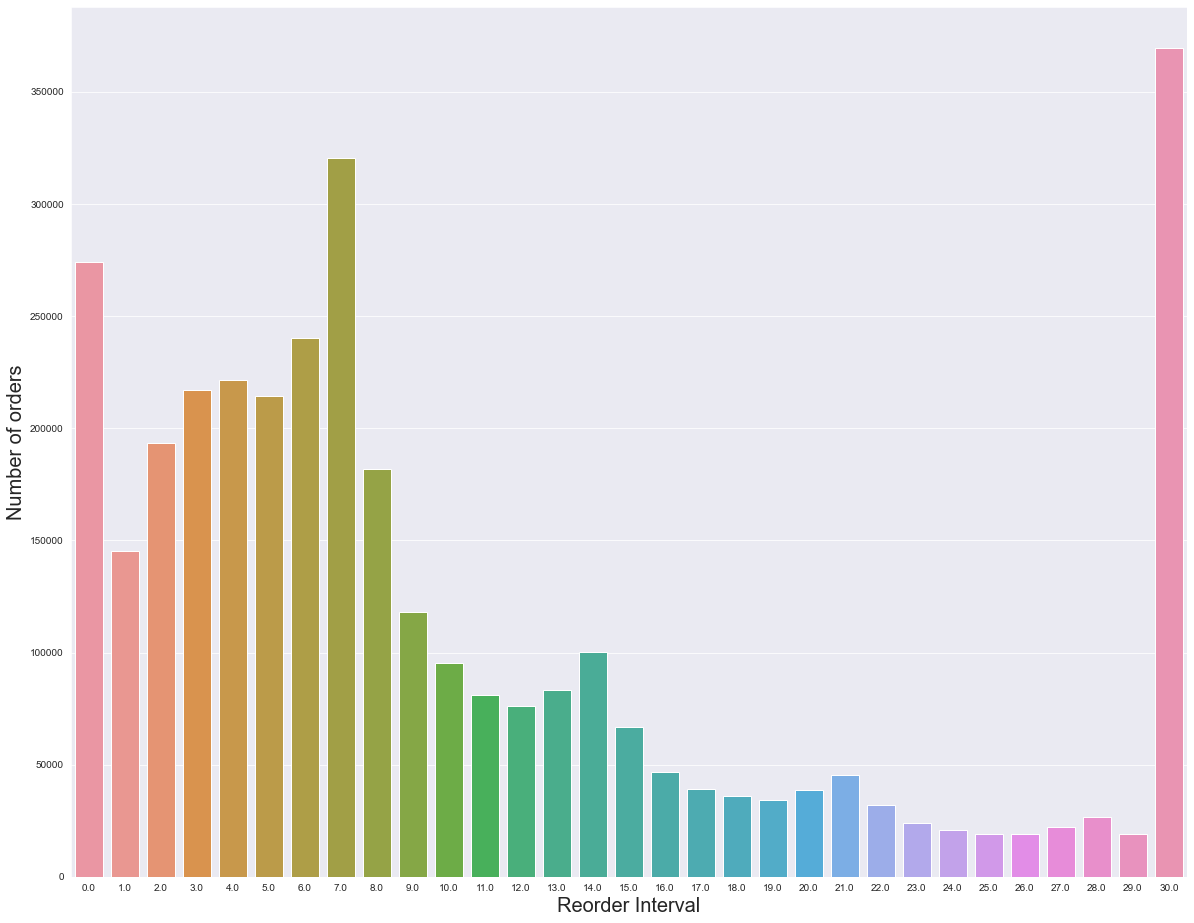

In [19]:
# reorder interval
gp7 = orders.groupby("order_id")["days_since_prior_order"].agg("sum").reset_index()
gp7 = gp7.days_since_prior_order.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20, 16))
sns.barplot(gp7.index, gp7.values)
plt.ylabel('Number of orders', fontsize = 20)
plt.xlabel('Reorder Interval', fontsize = 20)
plt.show()

So from these 3 plots, we know that people usually order between 8 am to 7 pm in a day, they order more often on Sunday and Monday, and the most common reorder interval is a week or a month. 

In [20]:
# heat map for the products - departments - aisles
gp8 = pd.merge(products, aisles, how = 'left', on = ['aisle_id'])
gp8 = pd.merge(gp8, departments, how = 'left', on = ['department_id'])
gp8

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [21]:
# Treemap to show relationship between departments / aisles / products
import squarify
from pyecharts import options as opts
from pyecharts.charts import TreeMap

In [22]:
gp9 = gp8.groupby(['department', 'aisle'])["product_name"].agg([('Total_products', 'count')]).reset_index()
gp9

,department,aisle,Total_products
0,alcohol,beers coolers,385
1,alcohol,red wines,232
2,alcohol,specialty wines champagnes,95
3,alcohol,spirits,195
4,alcohol,white wines,147
...,...,...,...
129,snacks,ice cream toppings,85
130,snacks,mint gum,168
131,snacks,nuts seeds dried fruit,582
132,snacks,popcorn jerky,316


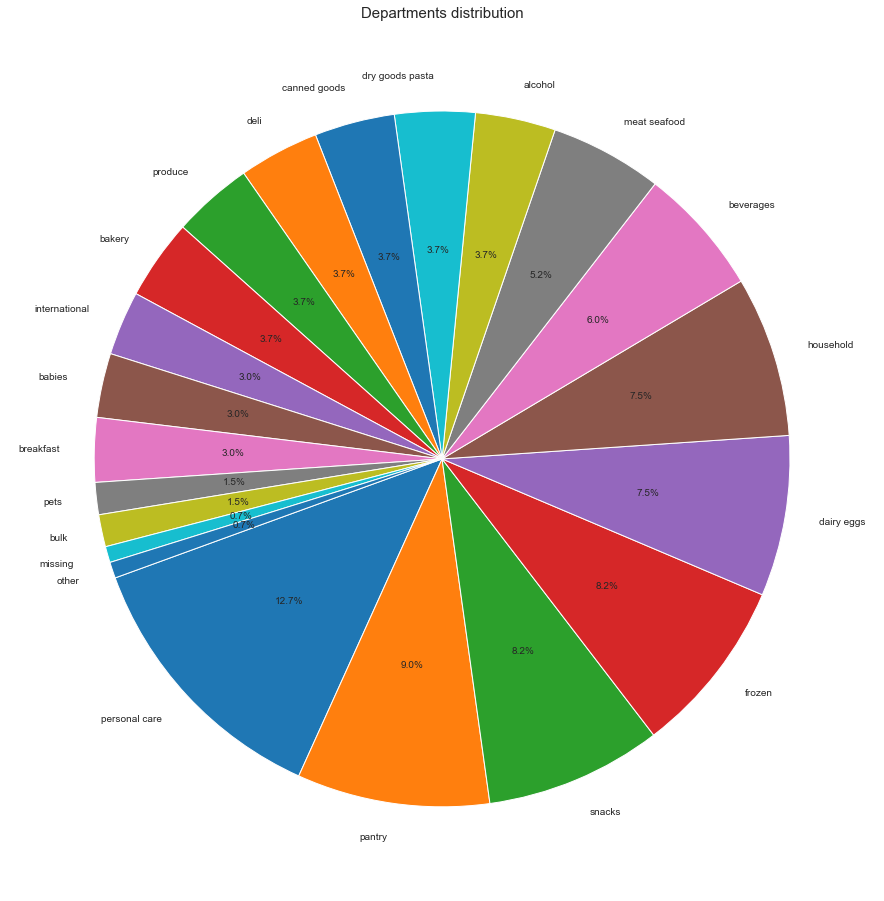

In [23]:
# department distribution view
plt.figure(figsize = (20, 16))
gp10 = gp9['department'].value_counts()
labels = (np.array(gp10.index))
sizes = (np.array((gp10 / gp10.sum()) * 100))
plt.pie(sizes, labels = labels, 
        autopct = '%1.1f%%', startangle = 200)
plt.title("Departments distribution", fontsize = 15)
plt.show()

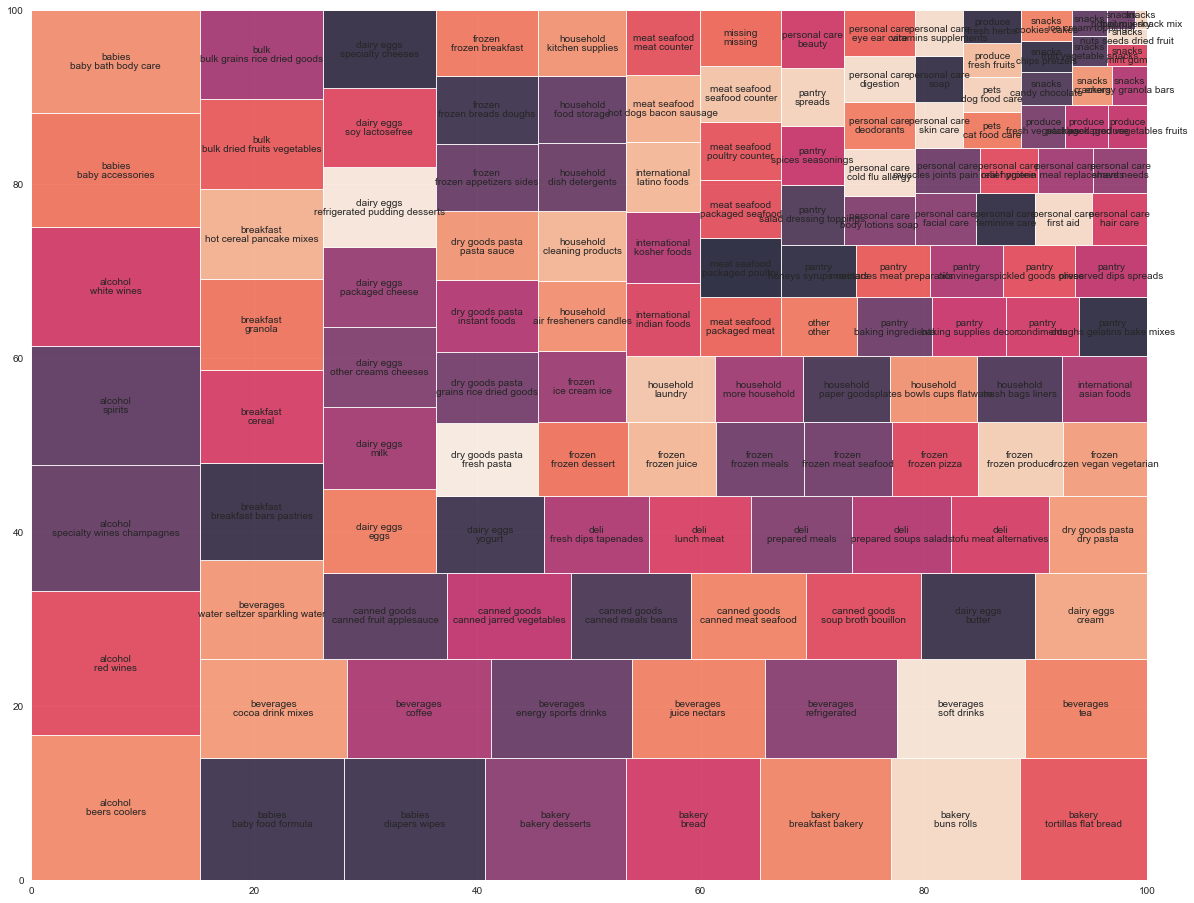

In [24]:
# aisle distribution treemap view
plt.figure(figsize = (20, 16))
squarify.plot(sizes = gp9['Total_products'].sort_values(ascending = False), 
              label = gp9.department, alpha = 0.8, value = gp9.aisle)
plt.axis('on')
plt.show()

### 3. Recommend System Modeling

due to the limitation of the memory, I only select orders contains 3 to 8 items

In [25]:
# count number of items each order has
gp11 = order_all.groupby("order_id")["add_to_cart_order"].agg([('No. of items', "max")]).reset_index()
gp11

,order_id,No. of items
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26
...,...,...
3346078,3421079,1
3346079,3421080,9
3346080,3421081,7
3346081,3421082,7


In [26]:
# select orders with 4 to 7 items
gp12 = gp11[(gp11["No. of items"] >= 4) & (gp11["No. of items"] <= 7)]
gp12

,order_id,No. of items
10,11,5
14,15,5
19,21,5
27,29,5
32,35,5
...,...,...
3346070,3421071,5
3346073,3421074,4
3346076,3421077,4
3346080,3421081,7


In [27]:
# inner join with order_all and orders, pick up user, order and product column
# and give rating as 1 for all the products since I want to generate a binary rating matrix consisting of 0’s and 1’s, 
# where 1’s indicate if the product was purchased.
gp13 = pd.merge(order_all, gp12, on = 'order_id', how='inner')
gp13 = pd.merge(orders, gp13, on = 'order_id', how='inner')
gp13 = gp13.loc[:, ['order_id', 'user_id', 'product_id']]
gp13['rating'] = 1
gp13

,order_id,user_id,product_id,rating
0,2539329,1,196,1
1,2539329,1,14084,1
2,2539329,1,12427,1
3,2539329,1,26088,1
4,2539329,1,26405,1
...,...,...,...,...
5125443,3059777,206208,37208,1
5125444,3059777,206208,35688,1
5125445,3059777,206208,46069,1
5125446,3059777,206208,47626,1


In [28]:
# use scipy to create a sparse matrix with user_id vs. product_id
import scipy
sparse_mat = scipy.sparse.coo_matrix((gp13.rating, (gp13.user_id, gp13.product_id)))
sparse_mat

<206209x49689 sparse matrix of type '<class 'numpy.int64'>'
	with 5125448 stored elements in COOrdinate format>

Build a Collaborative Filtering Model

In [29]:
# import library
from surprise import Reader, Dataset, SVD
from surprise.model_selection.validation import cross_validate

In [30]:
# generate a svd model
reader = Reader()
data = Dataset.load_from_df(gp13[['user_id', 'product_id', 'rating']], reader)
svd = SVD()

In [31]:
# Validate the model
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0260  0.0261  0.0260  0.0259  0.0260  0.0260  0.0001  
MAE (testset)     0.0100  0.0101  0.0101  0.0100  0.0100  0.0100  0.0000  
Fit time          287.87  289.29  285.66  284.77  284.86  286.49  1.79    
Test time         16.24   15.53   15.61   15.88   15.72   15.80   0.25    


{'test_rmse': array([0.02600079, 0.02605906, 0.0260301 , 0.02590321, 0.0259829 ]),
 'test_mae': array([0.01004152, 0.01005269, 0.01006512, 0.01002102, 0.01002968]),
 'fit_time': (287.8684878349304,
  289.2865481376648,
  285.6568138599396,
  284.7739245891571,
  284.8647835254669),
 'test_time': (16.24039340019226,
  15.53240156173706,
  15.610525369644165,
  15.87643051147461,
  15.71991229057312)}

In [32]:
# Train the model with all the selected data
trainset = data.build_full_trainset()
svd.fit(trainset)

In [33]:
# predict the best 10 products that a user might be interested (random pick user: 107147)
recommended = products.copy()
recommended['Estimate_Score'] = recommended['product_id'].apply(lambda x: svd.predict(107147, x).est)
recommended = recommended.sort_values(by = ['Estimate_Score'], ascending = False)
recommended.head(10)

,product_id,product_name,aisle_id,department_id,Estimate_Score
35027,35028,Organic Bakers Cocoa Powder,17,13,1.225562
43437,43438,Chicken Dumplings,49,12,1.217988
20455,20456,Beers Of Summer Variety Pack Beer,27,5,1.214050
22906,22907,Computer Eye Relief Eye Drops,44,11,1.212874
49166,49167,Northern Sonoma Chardonnay,62,5,1.212616
32675,32676,Chunk Light in Water Tuna,95,15,1.210597
41672,41673,Star Wars Healthy Kids Pasta Condensed Soup,69,15,1.209424
46633,46634,Lite Sweet Vidalia Onion Dressing,89,13,1.205116
5290,5291,Oxygen Bleach Plus,75,17,1.199752
1018,1019,Spicy Bbq Chicken Soup,100,21,1.196846


In [34]:
# compare the prediction with the products that this user bought before
check_data = gp13[(gp13["user_id"] == 107147)]
check_data = pd.merge(check_data, products, how = 'left', on = ['product_id'])
check_data

,order_id,user_id,product_id,rating,product_name,aisle_id,department_id
0,2097158,107147,34680,1,Bloody Mary Mix,6,2
1,2097158,107147,24658,1,House Blend Medium Keurig Brewed K-Cups Ground...,26,7
2,2097158,107147,7969,1,Lime,24,4
3,2097158,107147,31144,1,Mini I.D.'s Cold Stone Creamery Sweet Cream No...,53,16
4,2915029,107147,14947,1,Pure Sparkling Water,115,7
...,...,...,...,...,...,...,...
233,1693481,107147,25146,1,Original Orange Juice,31,7
234,1693481,107147,7898,1,Ginger Beer,77,7
235,1693481,107147,14947,1,Pure Sparkling Water,115,7
236,1693481,107147,13388,1,Land O' Lakes Mini Moo's Half & Half,53,16


As we can see that the products between the prediction and the actual bought has similarity